In [1]:
import osmnx as ox
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import contextily as ctx

# Set up basic configuration
ox.settings.log_console = True
ox.settings.use_cache = True

# Define the place name for Accra and download building footprints
place_name = "Accra, Ghana"
buildings = ox.features_from_place(place_name, tags={'building': True})

# Display the first few rows of the building data to confirm loading
print(buildings.head())

                         note  \
element_type osmid              
node         12001523417  NaN   
way          25413931     NaN   
             25413948     NaN   
             25413966     NaN   
             25414024     NaN   

                                                                   geometry  \
element_type osmid                                                            
node         12001523417                           POINT (-0.22857 5.62490)   
way          25413931     POLYGON ((-0.18991 5.55669, -0.19006 5.55652, ...   
             25413948     POLYGON ((-0.19054 5.55848, -0.19043 5.55860, ...   
             25413966     POLYGON ((-0.19172 5.55825, -0.19179 5.55832, ...   
             25414024     POLYGON ((-0.19192 5.55371, -0.19252 5.55302, ...   

                         source amenity denomination          name religion  \
element_type osmid                                                            
node         12001523417    NaN     NaN          NaN    

In [2]:
# Define the coordinates for Kotoka International Airport and Ridge Hospital
kotoka_airport = Point(-0.1681, 5.6061)  # Longitude, Latitude
ridge_hospital = Point(-0.198676, 5.561618)  # Longitude, Latitude

# Create buffers (no-fly zones) around each location with a 10 km radius
no_fly_zone_radius = 10000  # 10 km radius in meters
kotoka_no_fly_zone = kotoka_airport.buffer(no_fly_zone_radius)
ridge_no_fly_zone = ridge_hospital.buffer(no_fly_zone_radius)

# Create a GeoDataFrame to hold the no-fly zones
no_fly_zones = gpd.GeoDataFrame(geometry=[kotoka_no_fly_zone, ridge_no_fly_zone], crs="EPSG:4326")

# Display the first few rows of the no-fly zones data to confirm creation
print(no_fly_zones.head())

                                            geometry
0  POLYGON ((9999.83190 5.60610, 9951.67917 -974....
1  POLYGON ((9999.80132 5.56162, 9951.64859 -974....


In [3]:
# Reproject both the buildings and no-fly zones to Web Mercator (EPSG:3857) for consistency
buildings = buildings.to_crs(epsg=3857)
no_fly_zones = no_fly_zones.to_crs(epsg=3857)

/Users/tg1523/anaconda3/envs/drone_env/lib/python3.11/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


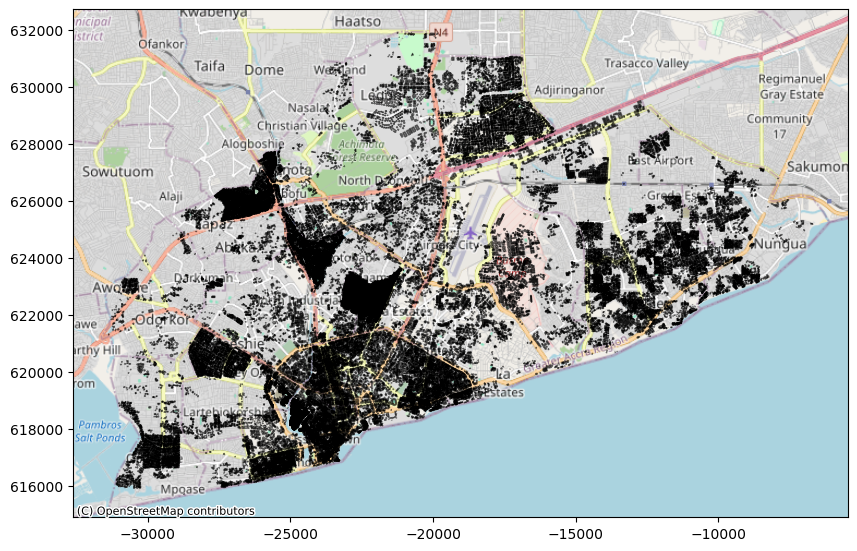

In [4]:
# Plot the buildings and no-fly zones on a map with a basemap
fig, ax = plt.subplots(figsize=(10, 10))
buildings.plot(ax=ax, color='black', alpha=0.5, edgecolor='k')
no_fly_zones.plot(ax=ax, color='red', alpha=0.4)

# Add a basemap for context
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

plt.show()

No-Fly Zones Bounds: [-32116.51115284 610091.03071797  -8712.80640235 635066.3530805 ]
Buildings Bounds: [-31386.80872789 615726.21718563  -6692.75042547 631908.19207564]


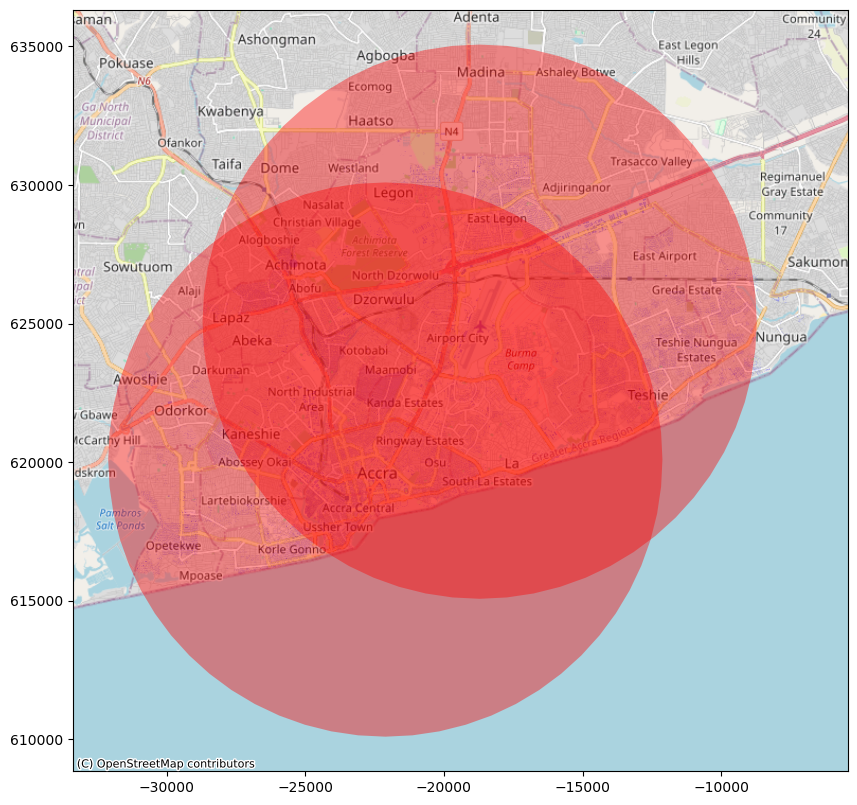

In [6]:
import osmnx as ox
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import contextily as ctx

# Set up basic configuration
ox.settings.log_console = True
ox.settings.use_cache = True

# Define the place name for Accra and download building footprints
place_name = "Accra, Ghana"
buildings = ox.features_from_place(place_name, tags={'building': True})

# Reproject buildings to Web Mercator CRS for consistency
buildings = buildings.to_crs(epsg=3857)

# Define the coordinates for Kotoka International Airport and Ridge Hospital
kotoka_airport = Point(-0.1681, 5.6061)  # Longitude, Latitude
ridge_hospital = Point(-0.198676, 5.561618)  # Longitude, Latitude

# Create a GeoDataFrame for these points
locations = gpd.GeoDataFrame(geometry=[kotoka_airport, ridge_hospital], crs="EPSG:4326")

# Reproject to Web Mercator CRS before buffering
locations = locations.to_crs(epsg=3857)

# Create buffers (no-fly zones) around each location with a 10 km radius
no_fly_zone_radius = 10000  # 10 km radius in meters
kotoka_no_fly_zone = locations.geometry[0].buffer(no_fly_zone_radius)
ridge_no_fly_zone = locations.geometry[1].buffer(no_fly_zone_radius)

# Create a GeoDataFrame to hold the no-fly zones
no_fly_zones = gpd.GeoDataFrame(geometry=[kotoka_no_fly_zone, ridge_no_fly_zone], crs="EPSG:3857")

# Debugging: Print the bounds of the no-fly zones and buildings to understand their locations
print("No-Fly Zones Bounds:", no_fly_zones.total_bounds)
print("Buildings Bounds:", buildings.total_bounds)

# Plot the buildings and no-fly zones on a map with a basemap
fig, ax = plt.subplots(figsize=(10, 10))
buildings.plot(ax=ax, color='blue', alpha=0.3, linewidth=0)
no_fly_zones.plot(ax=ax, color='red', alpha=0.4)

# Add a basemap for context
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

plt.show()